## **Logistic Regreesion extended**

### **Multicalss Classification**
- 3개 이상의 class로 분류를 하는 방법

<br>**[ 개념정리 ]**<br><br>
**Multiclass classification**
- 두 개 이상의 클래스를 가진 분류 작업
- 오렌지, 사과, 또는 배.. 이런느낌
- **중복 선택 불가** -> [1 0 0] 가능, [1 1 0] 불가
<br><br>

**Multilabel classification**
- 상호 배타적이지 않은 속성을 예측
- **중복 선택 가능**한 분류 -> [1 1 0] 가능
- 신문기사 분류 : 야구선수 - 연예인 결혼 -> 스포츠 / 연예

<br>**[ Approach ]**<br><br>
**One-vs-All**
- m개의 class가 존재할 때, 클래스마다 classifier 생성
- 1개의 class와 그 외'로 classifier생성하며 이것을 m개의 class만큼 진행
- 이 부분에 대해서 디테일하게 공부
<br><br>

**One-vs-One**
- 2쌍씩의 Class마다 Clasifier를 생성, 최종 선택 시 Classifier선택의 투표를 통해 결정
- 총 m(m-1) / 2 개 만큼의 Classifier 생성, 정확도 Up, Classifier를 많이 만들어서 그만큼 속도는 Down
- 앙상블 기법과 거의 흡사
- 이부분은 skitlearn으로만 공부

**Sigmoid function for multiclass**<br><br>
**One vs All Approach**
- m개의 classifier함수 $h_m(x; \theta)$ 생성
- $h_m(x; \theta)$의 확률 값 중 가장 높은 값을 가진 m을 선택
- **각 $h_m(x; \theta)$의 확률 합이 1이상이라는 문제점이 생김**
- 예시) $h_1 = 0.2$, $h_2 = 0.5$, $h_3 = 0.4$ $\cdots$ 이렇게되면 $h_m(x; \theta)$의 확률 합이 1을 넘게됨

#### **Softmax function for multiclass**
- 모든 class의 확률을 1로 Generalize함
> #### $\sigma(z)_j = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; for $j = 1, 2, 3, \cdots, K$
> $\sum_{j=1}^K \sigma(z)_j = \sum_{j=1}^K P_j = 1$<br><br>
> $where$ : $\sigma(z)_j$ = probability of class j<br>
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $K$ = last classification class

- 예시) 개or 고양이or 사자가 될 확률 i = [0.3, 0.2, 0.5]
- 이렇게 각 사건이 일어날 확률의 합이 1이되도록 Generalize해줌

#### **Softmax Function**<br>
Class가 두 개일 때
> ##### $\frac{P_j}{1 - P_j} \Rightarrow logit(P_j) = log_e (\frac{P_j}{1 - P_j}) = z = \theta^T x$

Class가 K개 일 떄
> ##### $\frac{P_j}{P_K} \Rightarrow logit(P_j) = log_e (\frac{P_j}{P_K}) = z_j = x^T \theta_j$
- $P_K$ : 마지막 사건이 일어날 확률
- 거기에 logit function 취해서 $z_j$구함.
- $z_j$ : 사건 j가 일어날 확률. $x$와 $\theta_j$의 linear combination으로 구할수있음
- $\theta$가 j개 만큼 있을 때, 각각을 x와 계산하여 가장 확률값이 큰걸 뱉을 수 있도록 식 설계

- 위의 식을 아래와 같이 정리
>##### $log_e (\frac{P_j}{P_K}) = z_j \Rightarrow \frac{P_j}{P_K} = e^{z_j}$
- 양쪽에 sum
>##### $ \Rightarrow \sum_{j=1}^K \frac{P_j}{P_K} = \sum_{j=1}^K e^{z_j}$
- $P_K$는 상수값이기 때문에 sum 밖으로 빼준다.
>##### $ \Rightarrow \frac{1}{P_K} \sum_{j=1}^K P_j = \sum_{j=1}^K e^{z_j}$
- $\sum_{j=1}^K P_j = 1$이기 때문에 아래처럼 표현.
>##### $ \Rightarrow \frac{1}{P_K} * 1 = \sum_{j=1}^K e^{z_j}$
>##### $ \Rightarrow P_K = \frac{1}{\sum_{j=1}^K e^{z_j}}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $(z_j = x \theta_j)$

> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{P_j}{P_K} = e^{z_j} $
>##### $ \Rightarrow \frac{P_j}{\frac{1}{\sum_{j=1}^K e^{z_j}}} = e^{z_j}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ($\because P_K = \frac{1}{\sum_{j=1}^K e^{z_j}}$)<br>
>##### $\therefore P_j = \frac{e^{z_j}}{\sum_{j=1}^K e^{z_j}}$
- $P_j$ : 어떤 사건이 일어날 확률
- 예를들어,$P_j$는 개,고양이,사자(j=1,2,3)일 확률이라 하고 각 확률값은 $e^{z_j}$의 총합분의 $e^{z_j}$가 된다.
- j=1 일때라면, j=1부터 K까지 $e^z$들의 합 분의 $e^{z_1}$이 된다.
- 그리하여, 최종적으로 각 확률들의 총합이 1이되는 softmax함수를 유도할 수 있다.

#### $P_j = \frac{e^{z_j}}{\sum_{j=1}^K e^{z_j}} = \frac{e^{z_j}}{\sum_{j=1}^K e^{x^T \theta_j}}$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;($\because z_j = x^T \theta_j$)


$\theta = \begin{bmatrix} \theta_1 \\ \theta_2 \\ \vdots \\ \theta_j \end{bmatrix} = \begin{bmatrix} w_{1 0} & w_{1 1} & \cdots & w_{1 i} \\ w_{2 0} & w_{2 1} & \cdots & w_{2 i} \\ \vdots & \vdots & \ddots & \vdots \\ w_{k 0} & w_{k 1} & \cdots & w_{k i} \end{bmatrix}$
- $\theta_j$에서 j : 클래스의 갯수
- 따라서, $w_{1 0}, w_{1 1}, \cdots, w_{1 i}$ : 첫번째 class일 때 weight의 값
- 예) class가 3개고 weight가 7개 일 때 구해야 하는 weight들은 $w_0$까지 포함하여 총 25개

<br><br>
#### **Softmax regression** - Multiclass Classifier
- Softmax function 학습 $\rightarrow$ 결국은 $\theta$의 학습
- 클래스마다 $\theta$가 존재함

> $h_\theta (x) = \begin{bmatrix} P(y = 1|x; \theta) \\ P(y = 2|x; \theta) \\ \vdots \\ P(y = K|x; \theta) \end{bmatrix} = \frac{1}{\sum_{j=1}^K exp(\theta^{(j)^T x})} \begin{bmatrix} exp(\theta^{(1)^T x}) \\ exp(\theta^{(2)^T x}) \\ \vdots \\ exp(\theta^{(K)^T x}) \end{bmatrix}$
- 각 클래스마다의 $\theta$값을 구해야한다.

- 따라서!, 이번 챕터의 목적 : 확률의 최대화 !
- 확률을 최대화할 $\theta$를 찾자

**[ Maximum Likelihood Estimation ]**
<br><br>
> $argmax_\theta \prod_{i=1}^m P(y^{(i)}|x^{(i)};\theta)$
- y의 값과 x의 값이 주어졌을 때, 전체 확률 P를 최대화 할 수 있는 $\theta$를 찾자(데이터의 갯수 : m개)

> $p^y(1-p)^{1-y} \Rightarrow p^{v_1}_1 p^{v_2}_2  \cdots p^{v_j}_j$
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
> where $ v_j=
> \begin{cases}
> 1 \ \ \ \ \ if \ y = v_j\\
> 0 \ \ \ \ \ if \ y \ne v_j
> \end{cases}$
- class가 binary한 상황에서는 왼쪽처럼 표현했지만 이제 multi class니까 오른쪽처럼 표현을 바꿔줌
- 클래스 1($p_1$)이 일어나면 그것의 지수인 $v_1 = 1$ 아니면 $v_1 = 0$

> $argmax_\theta \prod_{i=1}^n p(x^{(i)}; \theta^{(i)})^{(i)} (1 - p(x^{i}); > \theta^{(i)})^{(1 - y^{(i)})}$
- class가 binary한 상황에서의 최대화 식. 위의 바뀐 p표기들이 여기에 대입되어 multi class 상황에서의 새로운 식을 만들것


<br><br>**[ Negative Log-Likelihood ]**

> ##### $L = \prod_{i=1}^m P(y^{(i)} | x^{(i)}; \theta_j) = \prod_{i=1}^m \prod_{j=1}^K p^{(i)^{v_{ij}}}$
> $p_j^{(i)} = \frac{e^{x^{(i)T} \theta_j}}{\sum_{j=1}^K e^{x^{(i)T} \theta_j}}$ &nbsp;&nbsp;,&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
where $v_{ij} =
\begin{cases}
1\ \ \  \ \  \ \;if \ \;y^{(i)} is \ label \ j\\
0\ \ \  \ \  \ \;if \ \;y^{(i)} is \ NOT \ label \ j\\
\end{cases}$
- m개의 데이터와 K개의 클래스에서의 모든 p값들의 곱
- i번째 데이터가 j번째 클래스이면 1 아니면 0
- 그래서 예를들어 클래스 1,2,3에서 데이터 1이 [1, 0, 0] 이렇게 된다면, $v_{1 1} = 1$, $v_{1 2} = 0$, $v_{1 3} = 0$


- 확률을 최대화 하고자 했으나 그 반대 개념인 loss는 최소화 해줘야하기 때문에 -(minus) 붙인다.
- 확률들의 곱을 구하기는 어려움이 따라서 log를 씌워준다.
- Negative Log-Likelihood
> $-log L = -log \prod_{i=1}^m \prod_{j=1}^K p^{(i)^{v_{ij}}} = -\sum_{i=1}^m \sum_{j=1}^K v_{ij} log p^{(i)}_j$

- 따라서, 아래식을 최소화한다.
> $l = -\sum_{i=1}^m \sum_{j=1}^K v_ij log p_j^{i}$
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
> where $p_j^{(i)} = \frac{e^{z^{(i)}_j}}{\sum_{j=1}^K e^{z_j^{(i)}}}$

- 식 $l$을 최소화하는 weight값을 찾자
- $\frac{\partial l}{\partial p_j} \frac{\partial p_j}{\partial z_j} \frac{\partial z_j}{\partial \theta_j}$
- 사실 식 $l$을 p에 관하여 미분해야하는데 p는 z로 이루어져있고 z는 또 theta로 이루어져 있기 때문에 위와같이 체인룰에 의하여 결국 식 $l$을 theta로 미분해주는 꼴이된다.

- 우선 식 $l$을 z로 미분해보자<br>
$\frac{\partial l}{\partial z}$
-> 1) derivate of Negative-Log Likelihood <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-> 2) derivate of Softmax Function

<br><br>**[ Minimize Cost Funtion ]**

> ##### $\frac{\partial l}{\partial z_i} = - \sum_{j=1}^K v_{ij} \frac{\partial log p_j}{\partial z_i} = -\sum_{j=1}^K v_{ij} \frac{1}{p_j} \frac{\partial p_j}{\partial z_i}$
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
> ($\because \frac{d log_e f(x)}{dx} = \frac{1}{f(x)} \frac{df(x)}{dx}$)
- 여기서 $z_i$의 $i$는 몇번째 데이터할 때 $i$가 아니고 임의의 i, 그냥 미지수
>### $\frac{\partial z_c}{\partial p_j} = \frac{\partial \frac{e^{z_j}}{\sum_{k-1}^K e^{z_k}}}{\partial z_c} \Rightarrow f^{'}_j = \frac{g^{'}_j h_j - h^{'}_j g_j}{[h]^2}$
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
> (where $g_j = e^{z_j}$, $h_j = \sum_{k=1}^K e^{z_k}$)
- 이때 c는 class, c와 j도 그냥 미지수 둘이 같을수도 다를수도 있음

> if $c = j$ <br>
> #### $\frac{\partial p_j}{\partial z_c} = \frac{\partial \frac{e^{z_j}}{\sum_{k-1}^K e^{z_k}}}{\partial z_c} = \frac{e^{z_j}h_j - e^{z_c}e^{z_j}}{[h_j]^2} = \frac{e^{z_j}}{h_j} \frac{h_j - e^{z_c}}{h_j} = p_j(1 - p_j)$<br>
> $\because p_j = \frac{e^{z_j}}{\sum_{j=1}^K e^{z_j}}$
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
> $\frac{dy}{dx} = \frac{d(e^{x^2})}{x} = e^{x^2}(\frac{dx^2}{dx}) = 2x(e^{x^2})$

- 여기서 $e^{z_j} = g_j$,&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   $\sum_{k-1}^K e^{z_k} = h_j$로 치환해서 정리했음

> if $c = j$ <br>
> #### $\frac{\partial p_j}{\partial z_c} = \frac{\partial \frac{e^{z_j}}{\sum_{k-1}^K e^{z_k}}}{\partial z_c} = \frac{0 - e^{z_c}e^{z_j}}{[h_j]^2} = - \frac{e^{z_j}}{h_j} \frac{e^{z_c}}{h_j} = -p_j p_c$

- 위의 두 경우를 하나의 식으로 정리해보자
> ##### $\frac{\partial l}{\partial z_i} = - \sum_{j=1}^K v_{ij} \frac{1}{p_j} \frac{\partial p_j}{\partial z_i} = -\frac{v_i}{p_i} \frac{\partial p_i}{\partial z_i} - \sum_{j \ne i}^K \frac{v_j}{p_j} \frac{\partial p_j}{\partial z_i}$
- $-\frac{v_i}{p_i} \frac{\partial p_i}{\partial z_i}$ 부분만 i=j일 때고 그 뒤의 sum식은 i $\ne$ j 일때 
- i는 c라고 생각해도 무방함, 그렇게하면 더 이해가 쉬움
> ##### $= -\frac{v_i}{p_i}p_i(1-p_i) - \sum_{j \ne i}^K \frac{v_j}{p_j} (-p_j p_i)$
- 같을 때와 같지 않을 때 각각의 미분식은 위에서의 결과 활용
> ##### $= -v_i + v_i p_i + \sum_{j \ne i}^K v_j p_i = -v_i + \sum_{j=1}^K v_j p_i$
- 식 정리하면 이렇게 정리되고 sum식의 j $\ne$ i에 j = i 부분만 넣어주면 되니까 앞부분의 $v_i p_i$에서 $v_i$만 때서 sum식안에 넣어준다.
- 그렇게 해서 뒤의 식으로 정리
> $p_i - v_i$
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
> ($\because \sum_{j=1}^K v_j = 1$)

- 미분값 배웠으니 이제 이값을 업데이트 해보자

**[ Update weights ]**

> $w_{kj} = w_{kj} - \alpha \frac{\partial l}{\partial w_{kj}}$<br>
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$= w_{kj} - \alpha \frac{\partial l}{\partial z_k} \frac{\partial z_k}{\partial w_{kj}}$<br>
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$= w_{kj} - \alpha(p_k - v_k)x_j$<br>
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$= w_{kj} + \alpha(v_k - p_k)x_j$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ \Rightarrow w_{kj} = w_{kj} + \alpha \sum_{i=1}^n (v^{(i)}_k - p^{(i)}_k)x^{(i)}_j$

- w : weight
- k : 클래스, j : 변수 (예 : $w_{kj} = w_{13}$ : 번째 클래스에서 3번째 변수)
- 각각의 weight값들에 대해서 simultaneous하게 업데이트
- $(v^{(i)}_k - p^{(i)}_k)x^{(i)}_j$부분 예시 : 사자 고양이 강아지 = [1, 0, 0]로 되어있으면 $v^{(i)}_0 = 1$이고 $v^{(i)}_1 = 0$이 된다



**[ Cross-Entropy Loss Function ]**

- Loss Function을 Cross-Entropy Function이라고 부름

- Entropy는 목적 달성을 위한 경우의 수를 정량적으로 표현하는 수치 -> **작을 수록 경우의 수가 적음**

> $H(p) = -\sum_{i=1}^n p_i log p_i$
- $H(p)$값$\downarrow$ $\rightarrow$ entropy값$\downarrow$
- n : distint events
- 각 event $i$는 $p_i$의 가능성을 가진다.


<br><br>
#### **Softmax with Numpy**

**[ Iris dataset ]**
- 대표적인 Multiclass dataset. 우리가 활용할 dataset
- 붓꽃 정보를 모아서 3가지 붓꽃 종류 중 어디에 해당하는지를 찾는 문제
- 일반적으로 통계학자 Fisher가 제안한 데이터 셋으로 Fisher's Iris dataset이라고도 부름

![img](https://ifh.cc/g/fDtTKC.png)
![img](https://ifh.cc/g/CpGA50.png)

**Load dataset**

In [3]:
import sklearn
import numpy as np

In [2]:
from sklearn.datasets import load_iris
datasets = load_iris()

In [4]:
x_data = datasets["data"]
x_data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
y_data = datasets["target"]
y_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**One-hot Encoding for Y**<br><br>
where $v_{ij} =
\begin{cases}
1\ \ \  \ \  \ \;if \ \;y^{(i)} is \ label \ j\\
0\ \ \  \ \  \ \;if \ \;y^{(i)} is \ NOT \ label \ j\\
\end{cases}$

In [11]:
y_data = y_data.reshape([-1,1])
y_data[:3]

array([[0],
       [0],
       [0]])

In [12]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(y_data)  
y_data = enc.transform(y_data).toarray()
y_data[-1]

array([0., 0., 1.])

In [13]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
x_data_minmax = min_max_scaler.fit_transform(x_data)
x_data_minmax[:3]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667]])

In [14]:
x_0 =np.ones(x_data_minmax.shape[0])
x_data_minmax = np.column_stack((x_0, x_data_minmax))

x_data_minmax[:3]

array([[1.        , 0.22222222, 0.625     , 0.06779661, 0.04166667],
       [1.        , 0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [1.        , 0.11111111, 0.5       , 0.05084746, 0.04166667]])

In [15]:
weights = np.random.uniform(size=(3,5))
weights

array([[0.0941613 , 0.51615897, 0.75572245, 0.31359467, 0.29009101],
       [0.11561283, 0.51720294, 0.59211883, 0.61182526, 0.21761526],
       [0.89535784, 0.59210986, 0.70364909, 0.78237412, 0.656167  ]])

**Softmax function**
- $p_j^{(i)} = \frac{e^{x^{(i)T} \theta_j}}{\sum_{j=1}^K e^{x^{(i)T} \theta_j}}$
- softmax의 인자 z $=x^T \theta_j$

In [16]:
def softmax(z):
    e = np.exp(z)
    p = e / np.sum(np.exp(z), axis=1).reshape([-1,1])
    return p

**Cross Entropy**
- $-log L = -log \prod_{i=1}^m \prod_{j=1}^K p^{(i)^{v_{ij}}} = -\sum_{i=1}^m \sum_{j=1}^K v_{ij} log p^{(i)}_j$
- 아래 코드의 y값은 [1 0 0], np.log(softmax(z))은 [0.3 0.2 0.5]이런식으로 onehot encoding된 형태로 나옴. 그 두개를 곱해줌
- 위 식의$v_{ij}$도 onehot encoding

In [17]:
def cross_entropy_function(y, x, weights):
    z = x_data_minmax.dot(weights.T)
    result = - np.sum(
                np.sum(
                    (y * np.log(softmax(z))), axis=1).reshape((-1,1))
                )
    return result 

In [18]:
cross_entropy_function(y_data,x_data_minmax,weights)

174.09652003475725

**Weights update**
> $w_{kj} = w_{kj} - \alpha \frac{\partial l}{\partial w_{kj}}$<br>
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$= w_{kj} - \alpha \frac{\partial l}{\partial z_k} \frac{\partial z_k}{\partial w_{kj}}$<br>
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$= w_{kj} - \alpha(p_k - v_k)x_j$<br>
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$= w_{kj} + \alpha(v_k - p_k)x_j$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ \Rightarrow w_{kj} = w_{kj} + \alpha \sum_{i=1}^n (v^{(i)}_k - p^{(i)}_k)x^{(i)}_j$

In [19]:
def minimize_grdient(y, x, initial_weights, iterations = 500000, alpha=0.001):
    cost_history= []
    theta_history = []
    m = y.shape[0]
    theta = np.copy(initial_weights)
    
    number_of_classes = theta.shape[0]
    number_of_weights = theta.shape[1]
    
    for _ in range(iterations):
        original_theta = np.copy(theta)
        for k in range(number_of_classes):        
            for j in range(number_of_weights):
                partial_x = x[:, j]
                partial_entropy = y - softmax(x.dot(original_theta.T))
                theta[k][j]  = original_theta[k][j] + (
                    alpha* partial_entropy[:,k].dot(partial_x.T) ) /150
        if (_ % 10000) == 0:
            print(cross_entropy_function(y,x,theta)/150)
            cost_history.append(cross_entropy_function(y,x,theta))
    return theta, cost_history

In [20]:
# weights = minimize_grdient(y_data, x_data_minmax,weights)
theta, cost_history = minimize_grdient(y_data, x_data_minmax,weights)

1.1604591636178923
0.7443923471811454
0.6106864945702731
0.5374371481815604
0.48956385427280036
0.4548017624469416
0.4278319108681639
0.4059568213598915
0.38764533870895207
0.37195318795725485
0.3582603974942343
0.3461397033657677
0.3352851128590683
0.32547054786755597
0.31652461084819195
0.3083145048992892
0.30073540831389395
0.2937032344584169
0.287149567098
0.28101803611910153
0.275261672017003
0.26984094072064024
0.2647222608705633
0.25987686935721804
0.2552799422836754
0.2509099059703648
0.24674789120739074
0.2427772967718355
0.2389834372017241
0.23535325619758163
0.23187509161852574
0.22853848139218666
0.2253340021310091
0.22225313409156305
0.2192881475019315
0.21643200633731888
0.2136782864325971
0.21102110544519356
0.20845506266803104
0.20597518707345575
0.2035768922699978
0.2012559372928615
0.19900839234002624
0.19683060871938565
0.19471919239642274
0.19267098063270996
0.19068302128781758
0.18875255442470593
0.18687699591431045
0.18505392278105942


In [21]:
rand_index= np.random.randint(0,150,30)
rand_index

array([138,  90,  94, 126, 134,  82,   0, 144,  29,  76,  22,  90, 102,
        43,   1,  34,  81,  11, 101,  93,  36, 147, 113,  17,  58,  54,
        24,   8,  28,  75])

In [22]:
y_pred = np.argmax(softmax(x_data_minmax[rand_index].dot(theta.T)),axis=1) 
y_pred

array([2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 2,
       2, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [23]:
y_true = np.argmax(y_data[rand_index],axis=1)
y_true

array([2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 2,
       2, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [24]:
y_pred == y_true

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [25]:
sum(y_pred == y_true) / len(rand_index)

0.9666666666666667

#### **Metrics for Multiclass**

**[ Contusion matrix for multiclass ]**
- Class별로 True Positive와 Error로 분류
- FN행 기준, FP열 기준으로 값 확인
![img](https://ifh.cc/g/RzJJWd.png)


**[ Accuracy for multiclass ]**
- 전체 Class중 정확히 일치한 Class의 갯수
![img](https://ifh.cc/g/HzFkFN.png)


**[ Precision for multiclass ]**
- TP / (TP + FP), 하나의 클래스와 나머지 Column 클래스
- Precision A = TP_A / (TP_A + E_BA + E_CA + E_DA + E_EA)
![img](https://ifh.cc/g/LcxsoM.png)

**[ Recall for multiclass ]**
- TP / (TP + FN), 하나의 클래스와 나머지 Row 클래스
- Recall A = TP_A / (TP_A + E_AB + E_AC + E_AD + E_AE)
![img](https://ifh.cc/g/hTpvWD.png)

<br><br>
#### **Multiclass with sklearn**

**[ digit dataset ]**
- Optical Recognition of Handwritten Digits Data Set
- 손글씨로 쓴 숫자를 분류하는 데이터셋
- MNIST가 원조, scikt-learn에서 8by8 image 제공<br><br>
![img](https://ifh.cc/g/BPG3Ac.png)


**Data loading**

In [27]:
from sklearn import datasets

In [28]:
digit_dataset = datasets.load_digits()

In [29]:
digit_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [30]:
print(digit_dataset["DESCR"])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

- flatten하듯이 reshape해서 한 행에 64개씩

In [31]:
digit_dataset["data"][0].reshape(-1,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [32]:
digit_dataset["data"].shape

(1797, 64)

In [33]:
digit_dataset["target_names"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- ["images"][0]의 모습<br><br>
![img](https://ifh.cc/g/0Jwxy6.png)
- 8 x 8
- 아래의 코드의 실행결과를 보면 알수 있듯이, 색이 어두우면 값이 작고 색이 밝으면 값이 커지게 표현되있음

In [40]:
digit_dataset["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

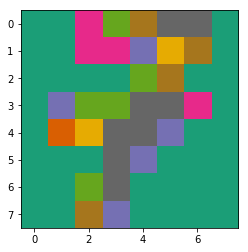

In [41]:
from matplotlib import pyplot as plt
plt.imshow(digit_dataset["images"][7],cmap=plt.cm.Dark2)
plt.show()

In [42]:
X = digit_dataset["data"]
y = digit_dataset["target"]

In [43]:
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

**Multiclass for LogisticRegression Class**
- multi_class : 'ovr', 'multinomial'

1. ovr : One Vs Rest : 각 class마다  그 class와 나머지로 classifier만든다.
2. multinomial : regression절차에 softmax까지 취해줘서 더 정규화된 값을 뱉는다. 아래 그림 참고<br>
![img](https://ifh.cc/g/mtRFnP.jpg)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [45]:
from sklearn.linear_model import LogisticRegression

logreg_ovr = LogisticRegression(multi_class="ovr")
logreg_softmax = LogisticRegression(multi_class="multinomial", solver="sag")

In [47]:
logreg_ovr.fit(X_train, y_train)
logreg_softmax.fit(X_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
y_pred = logreg_ovr.predict(X_test)
y_true = y_test

**Confusion matrix**

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  2,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 45,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  1,  0,  1,  0,  1],
       [ 0,  1,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 45,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1,  0, 42,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 33,  2],
       [ 0,  0,  0,  1,  0,  2,  0,  1,  1, 36]], dtype=int64)

**classification_report**
- 한번에 보여줌
- print 써줘야됨

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       0.93      0.93      0.93        56
          2       1.00      1.00      1.00        45
          3       0.92      0.94      0.93        49
          4       0.98      0.98      0.98        46
          5       0.92      0.98      0.95        46
          6       1.00      1.00      1.00        42
          7       0.95      0.95      0.95        44
          8       0.92      0.87      0.89        38
          9       0.92      0.88      0.90        41

avg / total       0.95      0.95      0.95       450



In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.9533333333333334

In [52]:
y_pred = logreg_softmax.predict(X_test)
y_true = y_test
accuracy_score(y_true, y_pred)

0.9733333333333334

In [53]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, average="macro")

0.9730130576334103

In [54]:
from sklearn.model_selection import cross_val_score

cross_val_score(logreg_ovr, X, y, scoring="accuracy", cv=20, n_jobs=8).mean()

0.9466728518230983

In [55]:
cross_val_score(logreg_softmax, X, y, scoring="accuracy", cv=20, n_jobs=8).mean()

0.9477588620029452

**[ One vs One or One vs Rest Classifier ]**<br><br>
**One vs One or One**
- class 나눌 때 


**OneVsRestClassifier**

In [56]:
from sklearn.multiclass import OneVsRestClassifier
y_pred = OneVsRestClassifier(logreg_ovr).fit(X_train, y_train).predict(X_test)
y_true = y_test
accuracy_score(y_true, y_pred)

0.9533333333333334

In [ ]:
len(OneVsRestClassifier(logreg_ovr).fit(X_train, y_train).estimators_)